In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
import pickle

In [8]:
#read in data
df = pd.read_csv("predict_res/predict_results_cnn_biLSTM.csv")
df.head(5)

,tweet_text,true_label,health,vax,gardasil,hpvvaccin,cancer,vaccin,cervicalcanc,studi,learntherisk,hpv,vaccineswork
0,vaccine cuts teen girls ' hpv rates by two-thi...,health,0.994133,0.002311,0.000003,0.000005,0.000003,0.003502,0.000001,3.759640e-05,5.719630e-07,0.000005,1.643450e-08
1,"rt : . vaxxed update ! gardasil tragedy , lead...",hpv,0.000049,0.000454,0.401399,0.000062,0.000156,0.000054,0.000009,2.377150e-07,2.721720e-05,0.597790,8.631390e-08
2,rt : are you another gardasil pusherman ?,gardasil,0.000012,0.001262,0.998460,0.000006,0.000122,0.000027,0.000037,1.737460e-06,3.395300e-05,0.000039,1.325730e-07
3,hpv vaccination rates highest among hispanic g...,"vax, vaccin",0.000088,0.423047,0.000018,0.000006,0.000025,0.576708,0.000038,4.421430e-05,6.985040e-06,0.000018,1.481930e-07
4,rt : online : integrated genomic and molecular...,cervicalcanc,0.000113,0.000213,0.000010,0.000002,0.000057,0.000016,0.999517,2.036460e-05,4.994800e-05,0.000002,6.414090e-10


In [9]:
labels = df['true_label']
labels[:5]

0          health
1             hpv
2        gardasil
3     vax, vaccin
4    cervicalcanc
Name: true_label, dtype: object

In [10]:
l = list(df)
fields = l[2:]
fields

['health',
 'vax',
 'gardasil',
 'hpvvaccin',
 'cancer',
 'vaccin',
 'cervicalcanc',
 'studi',
 'learntherisk',
 'hpv',
 'vaccineswork']

In [11]:
l = []

for i, row in df.iterrows():
    l.append(list(row[h] for h in fields))
#     df['p'][i] = list(row[h] for h in fields))

print(l[1])
df['p'] = pd.Series(l).values
df.head(5)

[4.91146e-05, 0.000453709, 0.401399, 6.1515e-05, 0.00015586200000000002, 5.42637e-05, 8.717039999999999e-06, 2.37715e-07, 2.7217199999999998e-05, 0.5977899999999999, 8.63139e-08]


,tweet_text,true_label,health,vax,gardasil,hpvvaccin,cancer,vaccin,cervicalcanc,studi,learntherisk,hpv,vaccineswork,p
0,vaccine cuts teen girls ' hpv rates by two-thi...,health,0.994133,0.002311,0.000003,0.000005,0.000003,0.003502,0.000001,3.759640e-05,5.719630e-07,0.000005,1.643450e-08,"[0.994133, 0.0023108, 2.58255e-06, 4.69428e-06..."
1,"rt : . vaxxed update ! gardasil tragedy , lead...",hpv,0.000049,0.000454,0.401399,0.000062,0.000156,0.000054,0.000009,2.377150e-07,2.721720e-05,0.597790,8.631390e-08,"[4.91146e-05, 0.000453709, 0.401399, 6.1515e-0..."
2,rt : are you another gardasil pusherman ?,gardasil,0.000012,0.001262,0.998460,0.000006,0.000122,0.000027,0.000037,1.737460e-06,3.395300e-05,0.000039,1.325730e-07,"[1.21391e-05, 0.00126196, 0.99846, 6.12448e-06..."
3,hpv vaccination rates highest among hispanic g...,"vax, vaccin",0.000088,0.423047,0.000018,0.000006,0.000025,0.576708,0.000038,4.421430e-05,6.985040e-06,0.000018,1.481930e-07,"[8.813899999999999e-05, 0.423047, 1.79259e-05,..."
4,rt : online : integrated genomic and molecular...,cervicalcanc,0.000113,0.000213,0.000010,0.000002,0.000057,0.000016,0.999517,2.036460e-05,4.994800e-05,0.000002,6.414090e-10,"[0.00011323899999999999, 0.0002131229999999999..."


In [12]:
df['p'][0]

[0.994133,
 0.0023108,
 2.58255e-06,
 4.69428e-06,
 2.7812299999999997e-06,
 0.00350224,
 1.3169200000000002e-06,
 3.75964e-05,
 5.71963e-07,
 4.7833099999999994e-06,
 1.64345e-08]

In [44]:
data = np.array(df['p'])
d = []
for each in data:
    d.append(np.array(each))
d[:2]

[array([9.94133e-01, 2.31080e-03, 2.58255e-06, 4.69428e-06, 2.78123e-06,
        3.50224e-03, 1.31692e-06, 3.75964e-05, 5.71963e-07, 4.78331e-06,
        1.64345e-08]),
 array([4.91146e-05, 4.53709e-04, 4.01399e-01, 6.15150e-05, 1.55862e-04,
        5.42637e-05, 8.71704e-06, 2.37715e-07, 2.72172e-05, 5.97790e-01,
        8.63139e-08])]

In [56]:
p2 = TSNE(n_components=2, perplexity=30, learning_rate=100.0, n_iter=5000).fit_transform(np.array(d))
p3 = TSNE(n_components=3, perplexity=30, learning_rate=100.0, n_iter=5000).fit_transform(np.array(d))

In [13]:
file2 = "temp/p2.pkl"
file3 = "temp/p3.pkl"

p2f(file2, p2)
p2f(file3, p3)

In [26]:
#load pretrained model
file2 = "temp/p2.pkl"
file3 = "temp/p3.pkl"

p2 = f2p(file2)
p3 = f2p(file3)

In [25]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

pred_labels = []
for each in d:
    pm = -1
    idx = -1
    for i, p in enumerate(each):
        if pm < p:
            pm = p
            idx = i
    pred_labels.append(idx)

palette = np.array(sns.color_palette("hls", 11))
pred_labels[:20]

[0, 9, 2, 5, 6, 1, 1, 1, 1, 5, 10, 1, 1, 1, 5, 1, 1, 1, 8, 8]

In [ ]:
#get true label
cw_map = {'cancer': 4,
 'cervicalcanc': 6,
 'gardasil': 2,
 'health': 0,
 'hpv': 9,
 'hpvvaccin': 3,
 'learntherisk': 8,
 'studi': 7,
 'vaccin': 5,
 'vaccineswork': 10,
 'vax': 1}

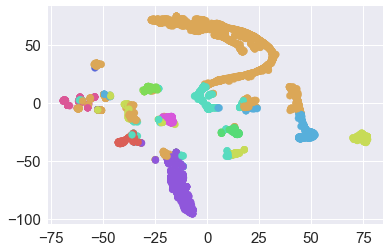

In [47]:
#perplexity=50
import matplotlib.pyplot as plt
x = p2[:, 0]
y = p2[:, 1]

#using pred_labels means coloring based on predicated label
plt.scatter(x, y, alpha=1, c=palette[pred_labels])
plt.show()

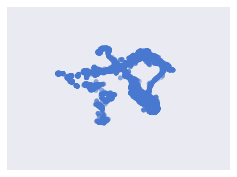

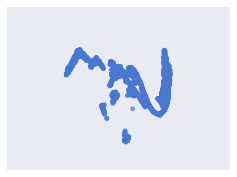

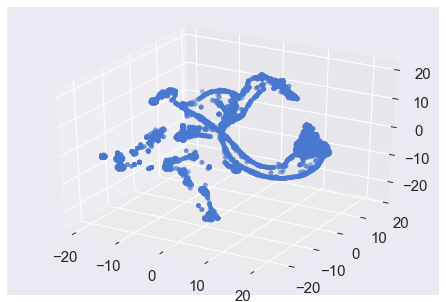

In [36]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

x = p3[:, 0]
y = p3[:, 1]
z = p3[:, 2]

fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z)
pyplot.show()

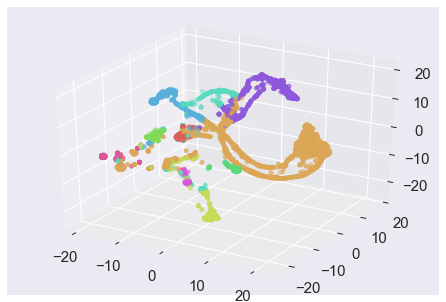

In [41]:
#perplexity=50
def threeD_plot_tweeter_cluster(x, y, z):
    fig = pyplot.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=palette[pred_labels])
    pyplot.show()
    
threeD_plot_tweeter_cluster(x = p3[:, 0], y = p3[:, 1], z = p3[:, 2])

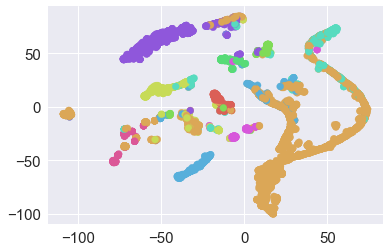

In [57]:
#perplexity=30
import matplotlib.pyplot as plt
x = p2[:, 0]
y = p2[:, 1]

#using pred_labels means coloring based on predicated label
plt.scatter(x, y, alpha=1, c=palette[pred_labels])
plt.show()

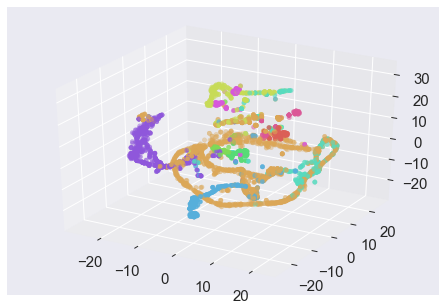

In [58]:
#perplexity=30
def threeD_plot_tweeter_cluster(x, y, z):
    fig = pyplot.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=palette[pred_labels])
    pyplot.show()
    
threeD_plot_tweeter_cluster(x = p3[:, 0], y = p3[:, 1], z = p3[:, 2])

In [ ]:
p3 = TSNE(n_components=3, perplexity=10, learning_rate=100.0, n_iter=5000).fit_transform(np.array(d))
#perplexity=10
def threeD_plot_tweeter_cluster(x, y, z):
    fig = pyplot.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=palette[pred_labels])
    pyplot.show()
    
threeD_plot_tweeter_cluster(x = p3[:, 0], y = p3[:, 1], z = p3[:, 2])

In [ ]:
d = prepare_data_for_TSNE("predict_res/predict_results_1biLSTM.csv")
pm = train_TSNE(d, dim=2, p=50, lr=100.0, itr=3000)
plot2D(pm, gen_label_color(get_labels(d)))

In [59]:
d = prepare_data_for_TSNE("predict_res/predict_results_1biLSTM.csv")
pm = train_TSNE(d, dim=3, p=50, lr=100.0, itr=3000)
plot3D(pm, gen_label_color(get_labels(d)))

KeyboardInterrupt: 

In [61]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import os, sys
import numpy as np
 
def make_views(ax,angles,elevation=None, width=4, height = 3,
                prefix='tmprot_',**kwargs):

    files = []
    ax.figure.set_size_inches(width,height)
     
    for i,angle in enumerate(angles):
     
        ax.view_init(elev = elevation, azim=angle)
        fname = '%s%03d.png'%(prefix,i)
        ax.figure.savefig(fname)
        files.append(fname)
     
    return files
  
def rotanimate(ax, angles, output, **kwargs):
    output_ext = os.path.splitext(output)[1]
 
    files = make_views(ax,angles, **kwargs)
    
    import imageio
    d = []
    for each in files:
        d.append(imageio.imread(each))
    imageio.mimsave('temp/movie.gif', d)
    
    for f in files:
        os.remove(f)

In [63]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

x = p3[:, 0] 
y = p3[:, 1] 
z = p3[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
f = ax.scatter(x,y,z, c=palette[pred_labels], s=2)
plt.axis('off')

angles = np.linspace(0,360,21)[:-1] # A list of 20 angles between 0 and 360
 
rotanimate(ax, angles,'temp/movie.gif',delay=20) 

RuntimeError: Imageio Pillow plugin requires Pillow lib.

In [ ]:
def prepare_data_for_TSNE(file):
    df = pd.read_csv(file)
    l = []
    for i, row in df.iterrows():
        l.append(list(row[h] for h in fields))
    df['p'] = pd.Series(l).values
    data = np.array(df['p'])
    d = []
    for each in data:
        d.append(np.array(each))
    return d

def train_TSNE(data, dim=2, p=50, lr=100.0, itr=1000):
    return TSNE(n_components=dim, perplexity=p, learning_rate=lr, n_iter=itr).fit_transform(np.array(d))

def p2f(file, data):
    with open(file, "wb") as fw:
        pickle.dump(data, fw)

def f2p(file):
    obj = None
    with open(file, "rb") as fr:
        obj = pickle.load(fr)
    return obj

def gen_label_color(labels):
    import seaborn as sns
    sns.set_style('darkgrid')
    sns.set_palette('muted')
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

    palette = np.array(sns.color_palette("hls", 11))
    
    return palette[labels]

def get_labels(d, flag=1):
    labels = []
    if flag:
        for each in d:
            pm = -1
            idx = -1
            for i, p in enumerate(each):
                if pm < p:
                    pm = p
                    idx = i
            labels.append(idx)
    else:
        cw_map = {'cancer': 4,'cervicalcanc': 6,'gardasil': 2,'health': 0,'hpv': 9,'hpvvaccin': 3,'learntherisk': 8,'studi': 7,'vaccin': 5,'vaccineswork': 10,'vax': 1}
    
    return labels

def plot2D(model):
    x = model[:, 0]
    y = model[:, 1]
    plt.scatter(x, y, alpha=0.5, c=palette[pred_labels])
    plt.show()

def plot3D(model, label_color):
    from matplotlib import pyplot
    from mpl_toolkits.mplot3d import Axes3D

    x = model[:, 0]
    y = model[:, 1]
    z = model[:, 2]

    fig = pyplot.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=label_color, s=2)
    pyplot.show()

In [51]:
#on large unlabeled dataset
d = prepare_data_for_TSNE("predict_res/predict_results_on_no_label_sample1biLSTM.csv")
pm = train_TSNE(d, dim=3, p=50, lr=100.0, itr=3000)

TypeError: p2f() missing 1 required positional argument: 'data'

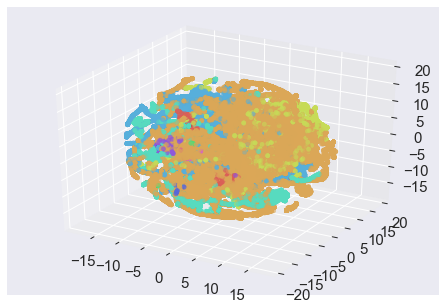

In [54]:
# pm = f2p("temp/p3_1biLSTM.pkl")
gen_label_color(get_labels(d))
plot3D(pm, gen_label_color(get_labels(d)))

In [ ]:
d = prepare_data_for_TSNE("predict_res/predict_results_on_no_label_sample1biLSTM.csv")
pm = train_TSNE(d, dim=3, p=30, lr=100.0, itr=3000)
# p2f(pm, "temp/p3_1biLSTM_30.pkl")

In [ ]:
pm = f2p("temp/p3_1biLSTM_30.pkl")
plot3D(pm, gen_label_color(get_labels(d)))